# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Petrus Hemat Siregar
- Email: siregarpetrus56@gmail.com
- Id Dicoding: petrus_hemat_siregar

## Menentukan Pertanyaan Bisnis

* Bagaimana performa penjualan dalam beberapa tahun terakhir ? <br>
* Berapa banyak orang yang memilih casual dibandingkan dengan registered ? <br>

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Tabel Day
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Tabel Hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
# Memeriksa tipe data dari day_df dan hour_df
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [5]:
# Cek apakah ada atau tidak missing value pada dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Cek apakah ada atau tidak missing value pada dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Cek duplikasi dataset day_df dan hour_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [8]:
# Cek parameter statistik dari kolom numerik pada dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Cek parameter statistik dari kolom numerik pada dataset hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
* Tidak ada duplicate pada dataset day_df maupun hour_df
* Tidak ada missing value pada dataset day_df maupun hour_df

### Cleaning Data

#### Dropping

In [10]:
# Menghapus kolom instant dimana menurut saya tidak ada hubungannya dengan yang lain
hour_df.drop(['instant'], axis = 1, inplace= True)
day_df.drop(['instant'], axis = 1, inplace= True)


#### Ubah Tipe Data

##### int menjadi category

In [11]:
coloumns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in coloumns:
    day_df[column] = day_df[column].astype("category")
    hour_df[column] = hour_df[column].astype("category")

##### object menjadi datetime

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
* Dropping yaitu menghapus kolom instant
* Mengubah tipe data dari int menjadi category dan object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [13]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.0,731.000000,731.0,731.0,731.0,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4.0,NaN,12.0,2.0,7.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188.0,NaN,62.0,710.0,105.0,NaN,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,0.500684,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Explore Data hour_df

In [14]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.0,17379.000000,17379.0,17379.000000,17379.0,17379.0,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4.0,NaN,12.0,NaN,2.0,7.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,NaN,5.0,NaN,0.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496.0,NaN,1488.0,NaN,16879.0,2512.0,NaN,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,0.502561,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,0.000000,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,1.000000,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,1.000000,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,1.000000,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
* Pada rangkuman statistik dataset day_df tersebut, kita memperoleh informasi jumlah pelanggan sebanyak 17379 di musim 1-4 memiliki top
* Pada rangkuman statistik dataset hour_df tersebut, kita memperoleh informasi jumlah pelanggan sebanyak 17379 dan rata-rata penyewaan sepeda terjadi pada jam 11.54 pada range antara jam 00.00 sampai 23.59

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dalam beberapa tahun terakhir ?

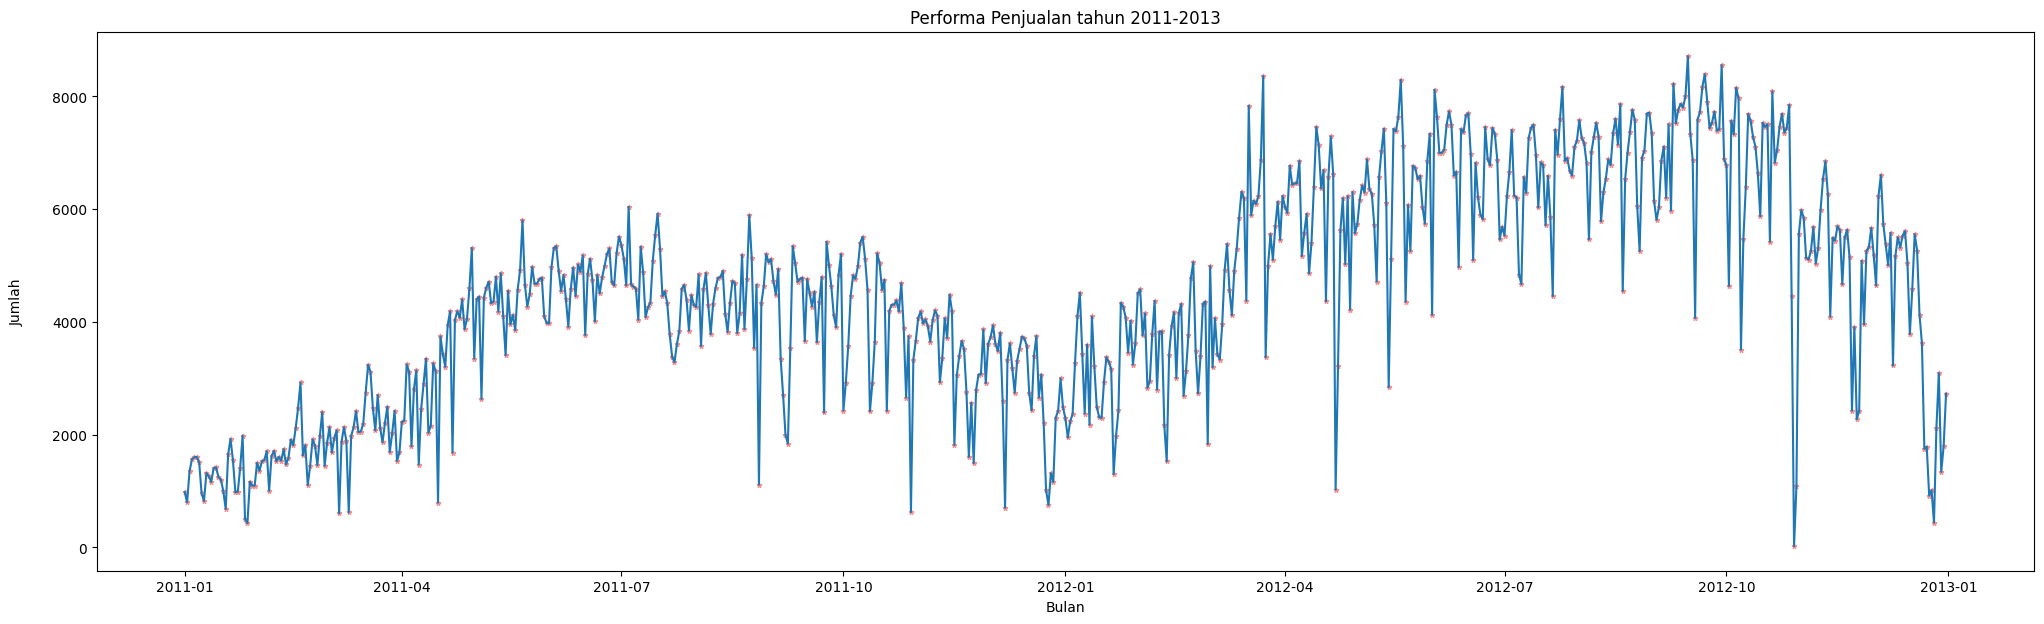

In [15]:
plt.figure(figsize=(25, 7))
montly_counts = day_df['cnt'].groupby(day_df['dteday']).max()
plt.scatter(montly_counts.index, montly_counts.values, c="#f99090", s=10, marker='*')
plt.plot(montly_counts.index, montly_counts.values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah', labelpad=20)
plt.title('Performa Penjualan tahun 2011-2013')
plt.show()

### Pertanyaan 2: Berapa banyak orang yang memilih casual dibandingkan dengan registered ?

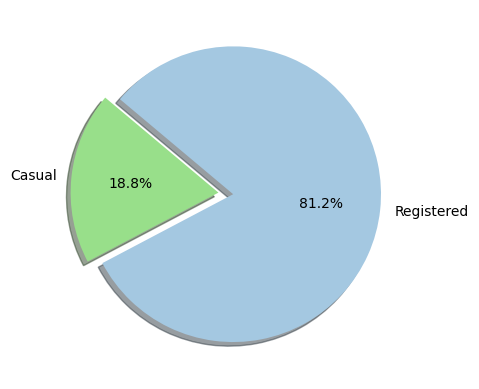

In [16]:
total_casual = sum(hour_df['casual'])
total_registered = sum(hour_df['registered'])
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']
explode = (0.1, 0)
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#98DF8A", "#A4C8E1"], explode=explode, shadow=True, startangle=140)
plt.show()

**Insight:**
* Berdasarkan visualisasi di atas dapat kita lihat bahwa yang sudah registered sebanyak 81.2% dan yg masih casual sebanyak 18.8%.
* Berdasarkan visualisasi di atas, kita bisa melihat jumlah order terbanyak pada bulan September dan Oktober. Selain itu kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan November dan Desember.

## Analisis Lanjutan

### RFM Analysis
* Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
* Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
* Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.

In [17]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,
    'atemp': 'count',  
    'cnt': 'sum'
}).reset_index()
rfm_df.columns = ['registered', 'Recency','Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


## Conclusion

* Conclusion pertanyaan 1: Berdasarkan visualisasi tersebut, kita dapat melihat jumlah order terbanyak terdapat pada bulan September tepatnya pada tahun 2012 dan mengalami penurunan yang cukup signifikan pada bulan November tepatnya pada tahun 2012 juga.
* Conclusion pertanyaan 2: Berdasarkan visualisasi di atas dapat kita lihat bahwa yang sudah registered sebanyak 81.2% dan yg masih casual sebanyak 18.8%